In [6]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm

 Camera matrix: [[651.25357417   0.         327.92109969]
 [  0.         652.46869878 221.92884596]
 [  0.           0.           1.        ]]
Distortion coefficient: [[ 1.22836603e-01  9.37758886e-01 -2.23400420e-02 -2.03137426e-03
  -4.05538169e+00]]
Rotation Vectors: (array([[-0.06445661],
       [ 0.02027771],
       [ 0.0270184 ]]), array([[0.07626997],
       [0.58561996],
       [0.05215548]]), array([[-0.06051536],
       [ 0.5255237 ],
       [ 0.05120474]]), array([[-0.13231025],
       [-0.56019914],
       [ 0.01128486]]), array([[-0.08089035],
       [-0.05655865],
       [ 0.06748568]]), array([[ 0.1080649 ],
       [-0.01253066],
       [ 0.02346428]]), array([[-0.06190243],
       [ 0.01829196],
       [ 0.02718585]]), array([[-0.06956427],
       [ 0.17246744],
       [ 0.06649756]]), array([[ 0.03366247],
       [-0.23308901],
       [ 0.03487715]]), array([[-0.0334124 ],
       [ 0.03300355],
       [ 0.05164562]]), array([[ 0.15081329],
       [-0.10959165],
       

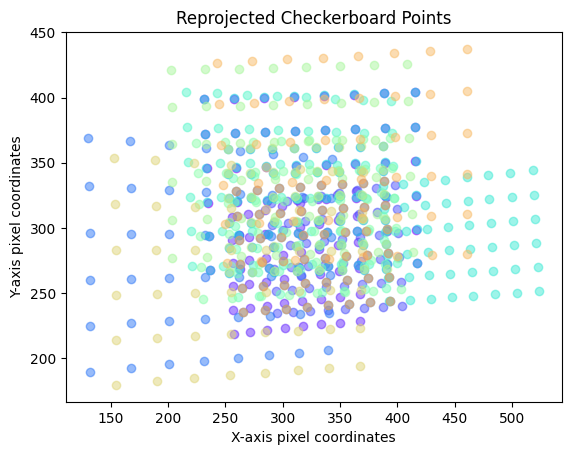

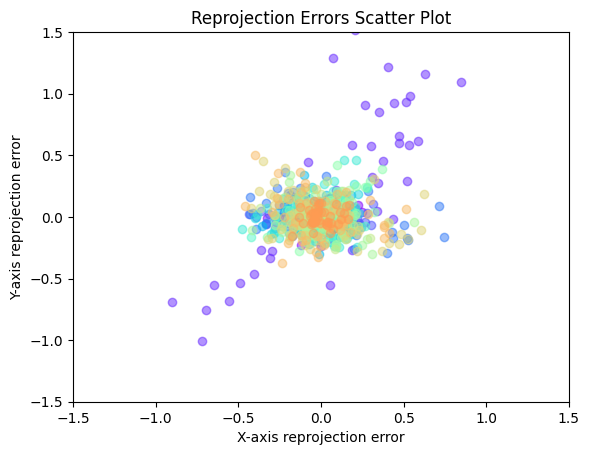

In [4]:


CHECKERBOARD = (8, 6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

threedpoints = []
twodpoints = []

objectp3d = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

# images = glob.glob('/home/fhc/ANU/2023 S1/honours/camera_calibration/saved_img/*png')
images = glob.glob('/home/fhc/ANU/Honours/camera_calibration_file/saved_img/*png')
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 

    ret, corners = cv2.findChessboardCorners(grayColor, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        threedpoints.append(objectp3d)
        corners2 = cv2.cornerSubPix(grayColor, corners, (11, 11), (-1, -1), criteria)
        twodpoints.append(corners2)
        image = cv2.drawChessboardCorners(image, CHECKERBOARD, corners2, ret)

    cv2.imshow('img', image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

h, w = 640,480
ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(threedpoints, twodpoints, grayColor.shape[::-1], None, None)

print(" Camera matrix: {}".format(matrix))
print("Distortion coefficient: {}".format(distortion))
print("Rotation Vectors: {}".format(r_vecs))
print("Translation Vectors: {}".format(t_vecs))

# Reprojection error plot
fig, ax = plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, len(images)))

for i in range(len(threedpoints)):
    img_points, _ = cv2.projectPoints(threedpoints[i], r_vecs[i], t_vecs[i], matrix, distortion)
    img_points_reshaped = img_points.reshape(-1, 2).astype(np.float32)
    
    for j in range(CHECKERBOARD[0]):
        ax.scatter(img_points_reshaped[j::CHECKERBOARD[0], 0], img_points_reshaped[j::CHECKERBOARD[0], 1], c=[colors[i]], marker='o', alpha=0.5, label=f"Image {i + 1}, Row {j + 1}" if j == 0 else "")

ax.set_title('Reprojected Checkerboard Points')
ax.set_xlabel('X-axis pixel coordinates')
ax.set_ylabel('Y-axis pixel coordinates')

# Add a legend
# ax.legend()
plt.show()




# Reprojection error plot
fig, ax = plt.subplots()
colors = cm.rainbow(np.linspace(0, 1, len(images)))

for i in range(len(threedpoints)):
    img_points, _ = cv2.projectPoints(threedpoints[i], r_vecs[i], t_vecs[i], matrix, distortion)
    img_points_reshaped = img_points.reshape(-1, 2).astype(np.float32)
    errors = twodpoints[i].reshape(-1, 2).astype(np.float32) - img_points_reshaped

    for j in range(CHECKERBOARD[0]):
        ax.scatter(errors[j::CHECKERBOARD[0], 0], errors[j::CHECKERBOARD[0], 1], c=[colors[i]], marker='o', alpha=0.5, label=f"Image {i + 1}, Row {j + 1}" if j == 0 else "")

ax.set_title('Reprojection Errors Scatter Plot')
ax.set_xlabel('X-axis reprojection error')
ax.set_ylabel('Y-axis reprojection error')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# Add a legend
# ax.legend()
plt.show()


